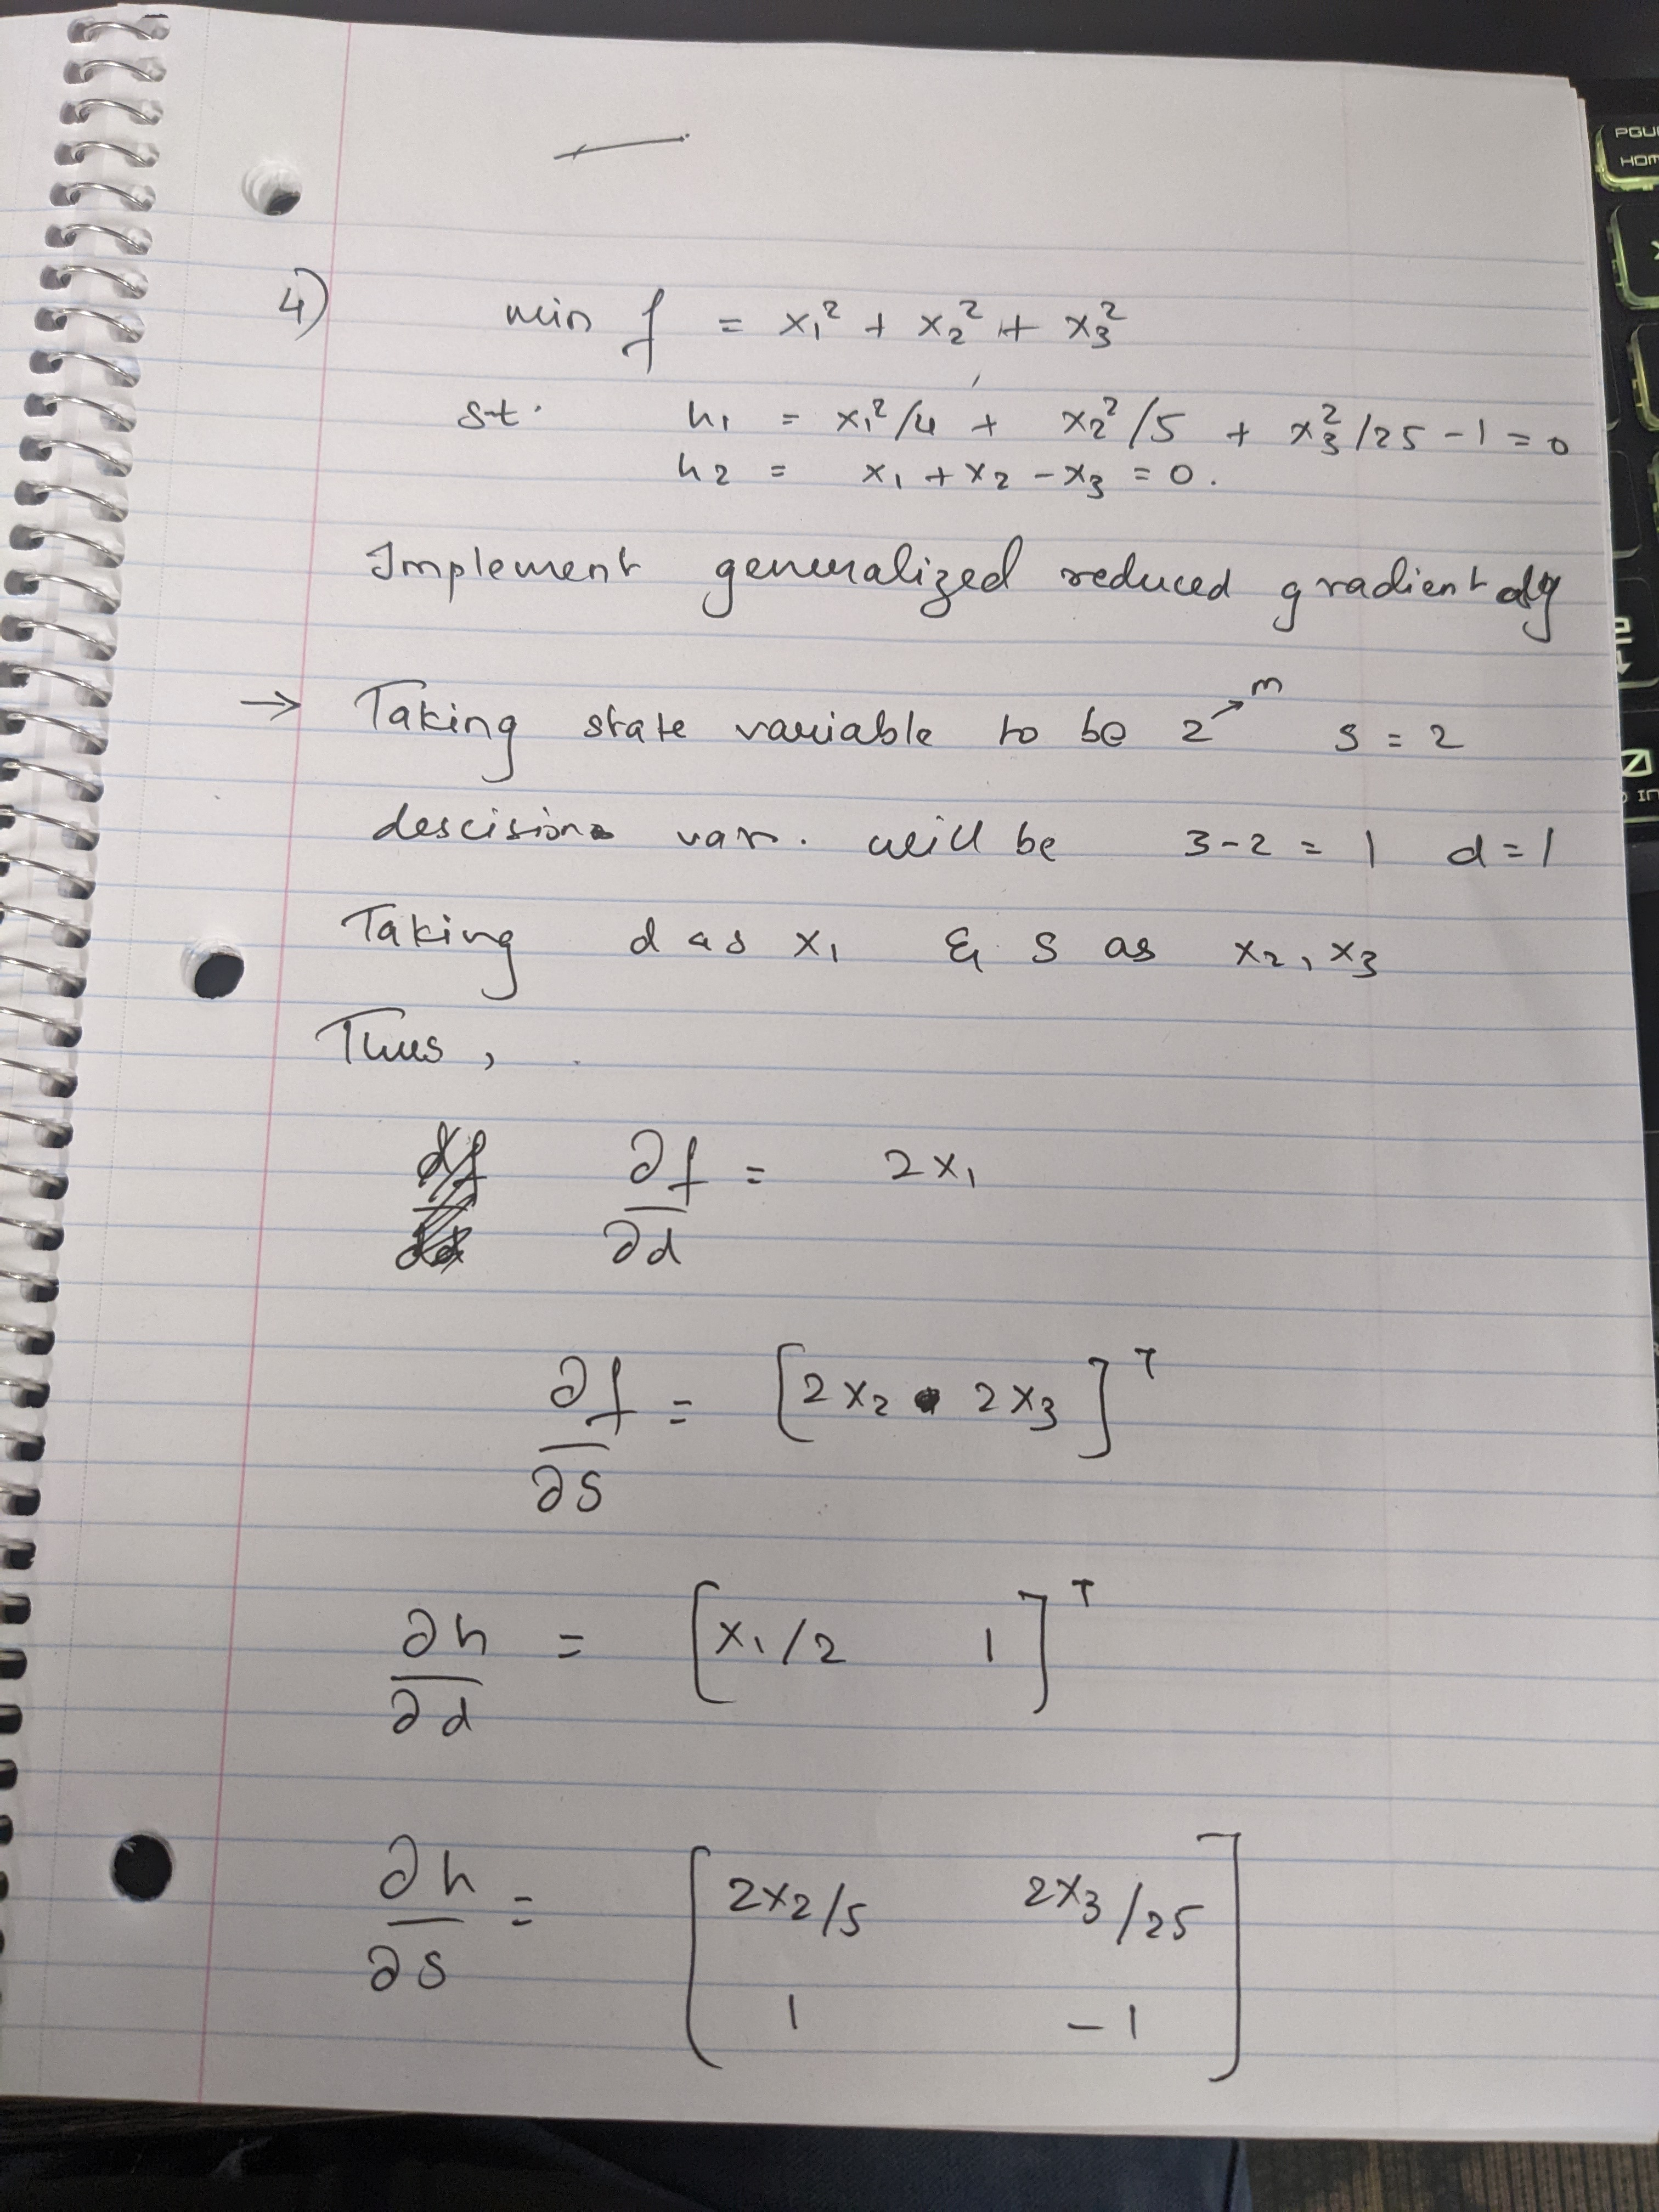

In [4]:
import numpy as np
import math

def obj(x):
    return x[0]**2 + x[1]**2 + x[2]**2

def pfpd(x):
    return 2*x[0] 

def pfps(x):
    return np.array([2*x[1], 2*x[2]])

def phps(x):
    return np.array([[2/5*x[1], 2/25*x[2]],[1, -1]])

def phpd(x):
    return np.array([[x[0]/2],[1]])

def DFDD(x):
    return pfpd(x) - np.matmul( np.matmul(pfps(x), np.linalg.inv(phps(x))), phpd(x) )

e = 0.001

def eval_x(x,a,dfdd): # For the linesearch.
    dk= (x[0]-a*dfdd)[0]
    sk= x[1:3] + a* np.transpose(np.matmul(np.matmul(np.linalg.inv(phps(x)), phpd(x)), np.transpose([DFDD(x)])))[0]
    return np.append(dk,sk)

def linesearch(dfdd, x):
    a=1
    b=0.5
    t=0.3
    while obj(eval_x(x,a,dfdd)) > (obj(x) - a*t* dfdd**2):
        a = b*a
    return a

def solve(x): 
    while np.linalg.norm(np.array([[x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1], [x[0]+x[1]-x[2]]])) > e:
        phps_new = phps(x)
        s_j_k = np.transpose( np.transpose([x[1:3]]) - np.matmul( np.linalg.inv(phps_new), np.array([[x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1], [x[0]+x[1]-x[2]]]))) 
        x = np.append(x[0:1], np.transpose(s_j_k[0]))
    return x 
        
x1 = 0 # initial guess
x3 = 1/12 * (((600 - 170*(x1**2))**(1/2)) + 10*x1) #h1 equation with x3 in x1 term
x2 = x3-x1 #from h2

x_list = np.array([x1, x2, x3])

x_val = [x_list]
error = []

while np.linalg.norm(DFDD(x_val[-1])) > e:
    x=x_val[-1]
    dfdd=DFDD(x)
    error.append(math.log(np.linalg.norm(dfdd)))
    a= linesearch(dfdd, x)
    dk= x[0]- a*dfdd
    sk0= x[1:3] + a* np.transpose(  np.matmul(np.matmul(np.linalg.inv(phps(x)), phpd(x)),  np.transpose(dfdd)) )
    xk0=np.append(dk,sk0)  
    x = solve(xk0)
    x_val.append(x)
    
print(*x_val, sep ='\n')

[0.         2.04124145 2.04124145]
[-0.68041382  2.0160676   1.33565379]
[-1.43623774  1.55540686  0.11916912]
[-1.5064045   1.47078893 -0.03561557]
[-1.54531881  1.41836864 -0.12695017]
[-1.56307938  1.39341626 -0.16966313]
[-1.57015185  1.38307519 -0.18707666]
[-1.57270552  1.37927958 -0.19342594]
[-1.57358733  1.37796101 -0.19562632]
[-1.57388669  1.37751246 -0.19637423]
[-1.5739877   1.37736099 -0.19662671]
